# A Data mining approach to predict human wine taste preferences
A [dataset](http://archive.ics.uci.edu/ml/datasets/Wine+Quality) with white and red <i>vinho verde</i> samples is considered.

The <b>Feature vector:</b>
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual suggar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

<b>Final Prediction:</b>
12. Quality

The original [paper](https://www.sciencedirect.com/science/article/pii/S0167923609001377?via%3Dihub) uses MR(multiple regression), SVN (Support Vector Machines) and NN (Neural Networks) for data mining.

Categorization of the problem:
- By Input: We have labeled data, which means we will do supervised learning
- By Output: We want to predict a class, which means we will do classification

**In this project on the other hand we will utilize Random Forests for classification.**

We achieve an accuracy of 96.22% without any model improvement.


# Game Plan
The ML Pipeline:

1. Question and the required data
2. Acquire the data
3. Data Analysis
4. Prepare the data for the ML model
5. Train the Model
6. Test the Model
7. Evaluate the Model
8. Interpret the Model and report results visually and numerically
9. Adjusting the Model



In [1]:
import pandas as pd
import numpy as np
import random
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import time
from pprint import pprint

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Can be used to export a decision tree in DOT format
from sklearn.tree import export_graphviz

import pydot
# Visualizing decision trees
from IPython.display import Image

sns.set()

# Data Analysis: Cleaning & Preparing

Data analysis usually occupies 80% of the time of any Data Scientist and Machine Learning Engineer. Without this crucial phase all the state-of-the-art models offered by *sklearn* would be completely in vain.

1. Tidy Data
2. Missing Data
3. Outliers
4. Class Imbalance Problem
5. Feature Correlation

In [2]:
features = pd.read_csv("data/winequality-white.csv", sep=";")
features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Tidy Data

Data is [tidy](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html)

## Identifying anomalies/missing data

- **Missing Data:** Imputing or dropping values.
Generally speaking, if an observation should have been made but it was not made, then you do not drop the sample. If it could not be made then you drop it.


- **Outliers:** Can be dropped

One way to spot different annomalies as well as missing data is to compute a summary statistics.

The following will give us a descriptive statistics

In [3]:
features.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


The dataset contains no missing values. However, it looks like we might have some outliers. 

Let's visualize the data so that we can better tell this.

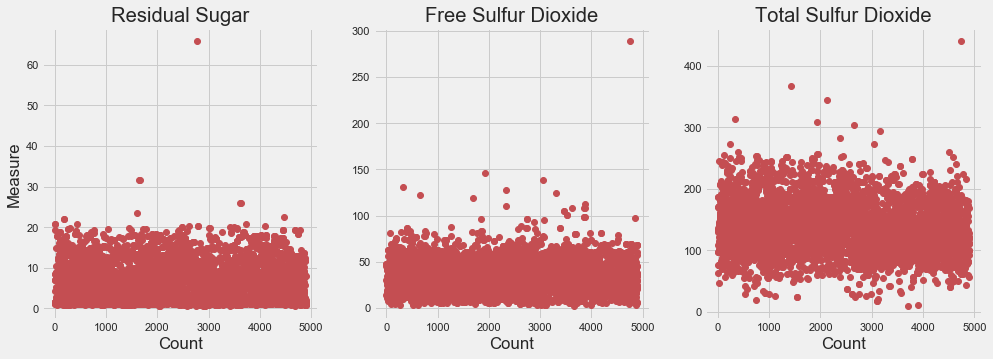

In [4]:
# Set the style
plt.style.use('fivethirtyeight')

# Plotting layout
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# residual sugar
ax1.plot(features['residual sugar'], 'ro')
ax1.set_ylabel("Measure"); ax1.set_xlabel("Count")
ax1.set_title("Residual Sugar")

# free sulfur dioxide
ax2.plot(features['free sulfur dioxide'], 'ro')
ax2.set_ylabel(""); ax2.set_xlabel("Count")
ax2.set_title("Free Sulfur Dioxide")

# total sulfur dioxide
ax3.plot(features['total sulfur dioxide'], 'ro')
ax3.set_ylabel(""); ax3.set_xlabel("Count")
ax3.set_title("Total Sulfur Dioxide")

plt.show()

We can certainly see outliers for these attributes. One way to deal with outliers is to remove and if we don't have many we can do so.

The outlier in the first figure belongs to <i>quality 6.0</i> for which we do have plenty of samples. However, the two other outliers belong to <i>3.0</i> for which we do not have too many samples. Dropping them means dropping 10% of the data for that kind of quality.

Lets set a threshold of <i>125</i> for outliers in <i>Free Sulfur Dioxide</i> and <i>300</i> for outliers in <i>Total Sulfur Dioxide</i> in order to further investigate this.

In [5]:
features[features['total sulfur dioxide']>300]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
325,7.5,0.27,0.31,5.80,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5
1417,8.6,0.55,0.35,15.55,0.057,35.5,366.5,1.00010,3.04,0.63,11.0,3
1931,7.1,0.49,0.22,2.00,0.047,146.5,307.5,0.99240,3.24,0.37,11.0,3
2127,9.1,0.33,0.38,1.70,0.062,50.5,344.0,0.99580,3.10,0.70,9.5,5
2654,6.9,0.40,0.22,5.95,0.081,76.0,303.0,0.99705,3.40,0.57,9.4,5
4745,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3


In [6]:
features[features['free sulfur dioxide']>125]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
325,7.5,0.270,0.31,5.8,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5
1931,7.1,0.490,0.22,2.0,0.047,146.5,307.5,0.99240,3.24,0.37,11.0,3
2334,7.5,0.230,0.35,17.8,0.058,128.0,212.0,1.00241,3.44,0.43,8.9,5
3050,6.2,0.255,0.24,1.7,0.039,138.5,272.0,0.99452,3.53,0.53,9.6,4
4745,6.1,0.260,0.25,2.9,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3


We can see that it seems that <i>quality=3</i> seems to have more outliers in both of these attributes and since we don't have much data of it (20 samples) in total it does not make sense to drop the outliers for these two features. 

So we will stick with dropping a single outlier for the feature <i>Residual Sugar<i>.

In [7]:
features = features.drop(index=features[features['residual sugar']>40].index, axis=0)

## Class-Imbalance Problem
Class Imbalance problem is a really nasty issue which is often difficult to tackle. Therefore a thumb up rule here is: data, data and some more data. When we have made sure that the phenomenon comes as a result of nature itself (from the way things are) and not from low amount of data we can proceed with investigating it.

In [8]:
print("Classes are indeed imbalanced")
print(round(100*(features['quality'].value_counts()/features.shape[0])), 2)

Classes are indeed imbalanced
6    45.0
5    30.0
7    18.0
8     4.0
4     3.0
3     0.0
9     0.0
Name: quality, dtype: float64 2


We can visualize this

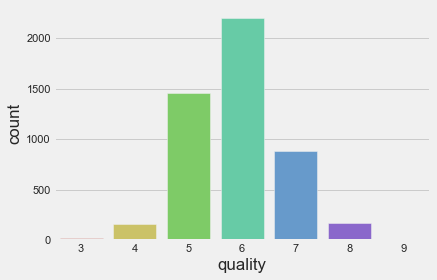

In [9]:
sns.countplot(x='quality', data=features, palette='hls'); plt.show()

We can see that a whooping **75%** of the data belong to only two classes!

However, if our classes are separated nicely then the class-imbalance is not really a problem. Although there are tools and techniques to check this here we will just visualize for a couple of attributes and classes at a time.

In [10]:
def get_rand_class():
    """Get 3 random classes from a total of 6. """
    rand = []
    while True:
        if len(rand) == 3:
            return rand
        r = random.randint(0,6)
        if r not in rand:
            rand.append(r)

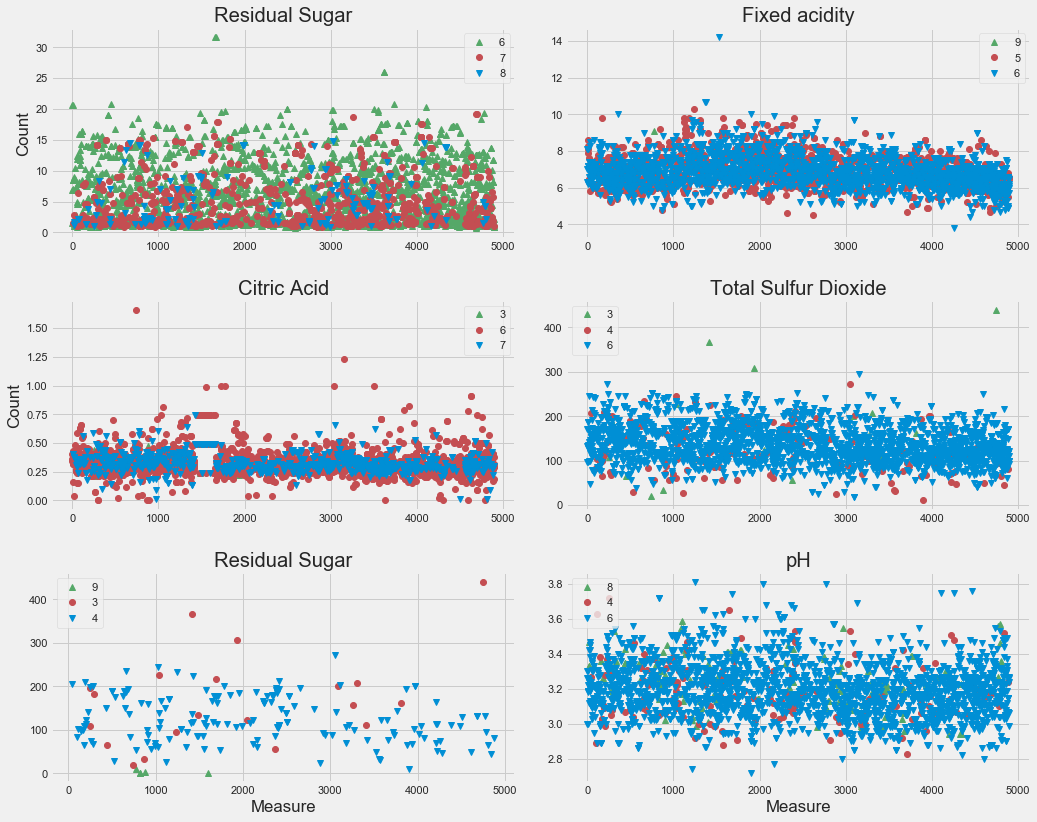

In [11]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(15,12))


# Feature: residual sugar
rs = list(features['residual sugar'].groupby(features['quality']))

# Randomly pick 3 classes to display
c1, c2, c3 = get_rand_class()
ax1.plot(rs[c1][1], 'g^', label=rs[c1][0])
ax1.plot(rs[c2][1], 'ro', label=rs[c2][0])
ax1.plot(rs[c3][1], 'v', label=rs[c3][0])
ax1.set_xlabel(""); ax1.set_ylabel("Count"); ax1.set_title("Residual Sugar")
ax1.legend()


# Feature: Fixed acidity
fa = list(features['fixed acidity'].groupby(features['quality']))

# Randomly pick 3 classes to display
c1, c2, c3 = get_rand_class()
ax2.plot(fa[c1][1], 'g^', label=fa[c1][0])
ax2.plot(fa[c2][1], 'ro', label=fa[c2][0])
ax2.plot(fa[c3][1], 'v', label=fa[c3][0])
ax2.set_xlabel(""); ax2.set_ylabel(""); ax2.set_title("Fixed acidity")
ax2.legend()

# Feature: citric axid
ca = list(features['citric acid'].groupby(features['quality']))
c1, c2, c3 = get_rand_class()
ax3.plot(ca[c1][1], 'g^', label=ca[c1][0])
ax3.plot(ca[c2][1], 'ro', label=ca[c2][0])
ax3.plot(ca[c3][1], 'v', label=ca[c3][0])
ax3.set_xlabel(""); ax3.set_ylabel("Count"); ax3.set_title("Citric Acid")
ax3.legend()

# Feature: total sulfur dioxide
tsd = list(features['total sulfur dioxide'].groupby(features['quality']))
c1, c2, c3 = get_rand_class()
ax4.plot(tsd[c1][1], 'g^', label=tsd[c1][0])
ax4.plot(tsd[c2][1], 'ro', label=tsd[c2][0])
ax4.plot(tsd[c3][1], 'v', label=tsd[c3][0])
ax4.set_xlabel(""); ax4.set_ylabel(""); ax4.set_title("Total Sulfur Dioxide")
ax4.legend()

# Feature: residual sugar
rs2 = list(features['residual sugar'].groupby(features['quality']))
c1, c2, c3 = get_rand_class()
ax5.plot(rs2[c1][1], 'g^', label=rs2[c1][0])
ax5.plot(tsd[c2][1], 'ro', label=rs2[c2][0])
ax5.plot(tsd[c3][1], 'v', label=rs2[c3][0])
ax5.set_xlabel("Measure"); ax5.set_ylabel("Count"); ax5.set_title("Residual Sugar")
ax5.legend()

# Feature: pH
ph = list(features['pH'].groupby(features['quality']))
c1, c2, c3 = get_rand_class()
ax6.plot(ph[c1][1], 'g^', label=ph[c1][0])
ax6.plot(ph[c2][1], 'ro', label=ph[c2][0])
ax6.plot(ph[c3][1], 'v', label=ph[c3][0])
ax6.set_xlabel("Measure"); ax5.set_ylabel(""); ax6.set_title("pH")
ax6.legend()


plt.tight_layout(pad=2)

We can tell from this plots that the features are not separated at all (some exceptions are there but they do not change the rule). This means that the class-imbalance problem for this dataset is real!

Among the options that we are left with is *undersampling* or *oversampling* but for now we will just stick with the data as is and see how our model fares.

We basically do nothing regarding this.

## Feature correlation
A high correlation between features is almost always not feasible for the ML algorithms. Therefore we always aim to feature engineer correlated features.

### Correlation with the quality variable
Lets see important variables in predicting the quality by checking the feature's correlation with it.

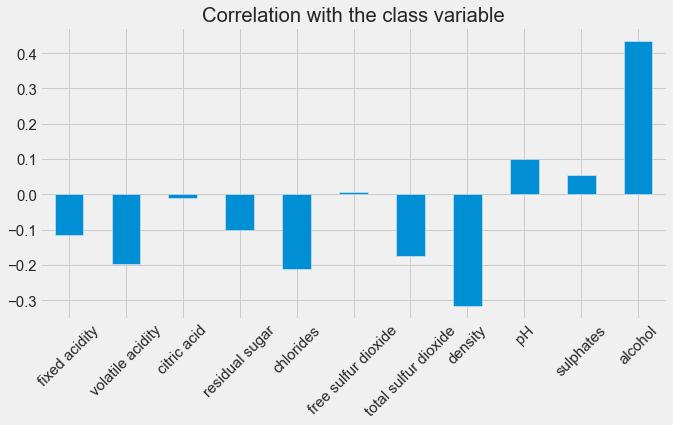

In [12]:
# Drop the quality and plot with pandas
features.drop("quality", axis=1).corrwith(features['quality']).plot.bar(figsize=(10,5),
                                        title='Correlation with the class variable', rot=45, fontsize=15)
plt.show()

So, taking the correlation into acount, we can see that *alcohol* is the most important feature in our feature vector for predicting the quality of the wine. Note that even variables that are negatively correlated with it (like *density*) are indeed because in this case they could simply be contributors of a lower quality. 

*Citric acid* and *free sulfur dioxide* seem to have the lowest correlation.

*alcohol* and *density* seem to have the highest correlation. 

We can also check feature importances using panda's *groupby*

In [30]:
quality_group = features.groupby('quality')
print(quality_group.agg(np.mean))

         fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             7.600000          0.333250     0.336000        6.392500   
4             7.129448          0.381227     0.304233        4.628221   
5             6.933974          0.302011     0.337653        7.334969   
6             6.837233          0.260244     0.337906        6.414588   
7             6.734716          0.262767     0.325625        5.186477   
8             6.657143          0.277400     0.326514        5.671429   
9             7.420000          0.298000     0.386000        4.120000   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.054300            53.325000            170.600000  0.994884   
4         0.050098            23.358896            125.279141  0.994277   
5         0.051546            36.432052   

Here we see that alcohol doesn't have the importance that the correlation plot showed us. **correlation != causality**

### Correlation Matrix: Correlation of features with each-other.

Variables to utilize when using *sns.heatmap*
- vmax: Achoring the color map to values. If not specified, it will infer from the data
- linewidths: The widths of the lines dividing the cells
- cbar_kws: in the below case we specify the height of the stripe showing the values
- annot: allow annotations inside the boxes
- fmt: formatting the annotations

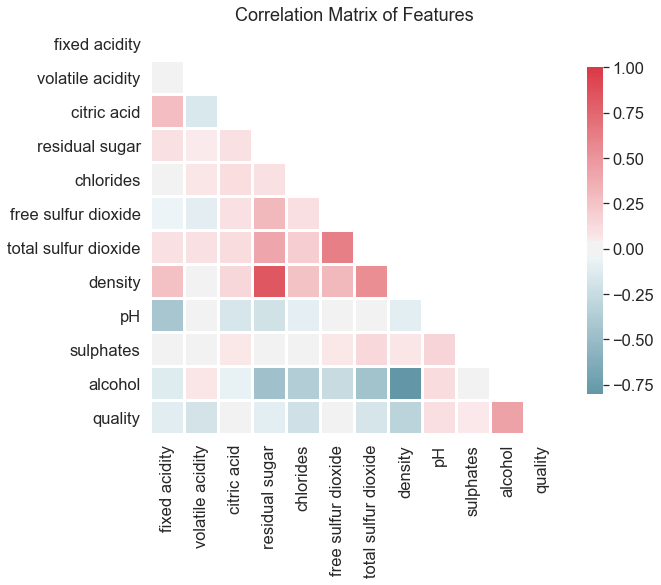

In [13]:
sns.set(style='white', font_scale=1.5)

# Compute the correlation matrix
# The correlation matrix is an array where the main diagonal separetes two identical triangles
corrMatrix = features.corr()

# Create a mask for the upper triangle so that we can ignore it later when building the heatmap
# When we pass this mask to the heatmap function it will generate no data for the upper triangle
mask = np.zeros_like(corrMatrix, dtype=np.bool)
# Get the indices of the upper-triangle of arr: triu_indices_from
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
# Colormap for the different values of the correlation matrix
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(9, 7))
plt.title("Correlation Matrix of Features")

# Draw the heatmap
sns.heatmap(corrMatrix, square=True, mask=mask, cmap=cmap, center=0, linewidths=2.0, cbar_kws={"shrink": 0.8})

plt.show()

The features seem to be somewhat correlated with each-other. 
- *alcohol* and *density* are negatively correlated to a rather significant amount. 
- *density* and *residual sugar* are positively correlated to a significant amount as well

*desity* and *alcohol* are also highly correlated with the *quality*. An increase of alcohol increases the quality but an increase in density decreases it. Therefore it doesn't seem such a good idea to merge them in one single feature.

# Prepare the data for the machine learning model

1. One-Hot Encoding
2. Class and Features
3. Train/Test
4. Scaling/Standardisation if needed 

### One-Hot encoding: We need not perform this for our current dataset

## Features and classes

In [14]:
# The predicted classes
labels = np.array(features['quality'])

# Features
features_list = list(features.columns)
features_list.remove('quality')

# Features values
features_values = features.drop('quality', axis = 1)

## Train & Test Data

Use *stratify* because our classes are not balanced. With *stratify* we can preserve the class imbalance into the train, test sets. This will ensure a better model.

In [15]:
train_features, test_features, train_labels, test_labels = train_test_split(features_values, labels, 
                                                                test_size = 0.2, random_state = 3, stratify=labels)

print("Shape of our train and test samples")
print("Shape of train features:", train_features.shape)
print("Shape of train labels:", train_labels.shape)
print("Shape of test features:", test_features.shape)
print("Shape of test labels:", test_labels.shape)

Shape of our train and test samples
Shape of train features: (3917, 11)
Shape of train labels: (3917,)
Shape of test features: (980, 11)
Shape of test labels: (980,)


# Train the Model

Yes! With the state-of-the-art scikit-learn algorithm, training our model looks this the following!

In [16]:
# Instantiate Model
# Set a random_state in order to get consistent results
rf = RandomForestClassifier(n_estimators=100, random_state=3)

# Train the model
rf.fit(train_features, train_labels);

# Make Predictions on Test Data
One way to do this is using the confusion matrix and then calculating the Micro-Precision. We use Micro- and not Macro- precission because Macro-Precision is not flexible to class-imbalance problem which we do have in this case.

$MicroP = \frac{TP}{(TP+FP)}$

In [17]:
predictions = rf.predict(test_features)
confusion_mat = confusion_matrix(test_labels, predictions)
microP = sum(np.diag(confusion_mat) / sum(sum(confusion_mat)))

print("Micro precision {}%".format(round(microP*100, 2)))

# Calculate with library
print("Precision {}%".format(round(100*accuracy_score(test_labels, predictions), 2)))

Micro precision 68.06%
Precision 68.06%


# Evaluate the Model
Visualize the confusion matrix

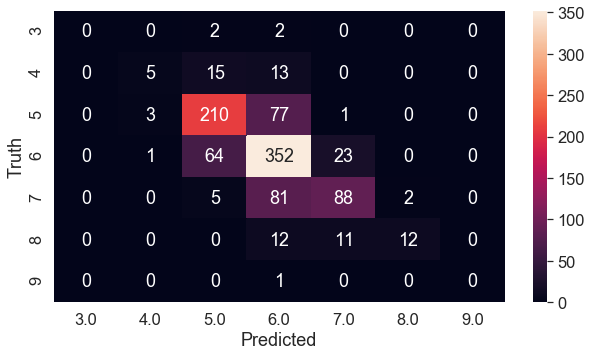

In [18]:
plt.figure(figsize=(9,5))
xticklabels=np.append(3.0, np.unique(predictions))
xticklabels=np.append(xticklabels, 9.0)
yticklabels=np.unique(np.array(test_labels))

sns.heatmap(confusion_mat, square=False, annot=True, fmt='d', cbar=True, xticklabels=xticklabels,
            yticklabels=yticklabels)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [19]:
# We get get a dic of the values as keys and the count as the values of the dic
print("Number of samples per class, real data",collections.Counter(np.array(train_labels)))
print("Number of samples per class, predicted data",collections.Counter(predictions))

Number of samples per class, real data Counter({6: 1757, 5: 1166, 7: 704, 8: 140, 4: 130, 3: 16, 9: 4})
Number of samples per class, predicted data Counter({6: 538, 5: 296, 7: 123, 8: 14, 4: 9})


It looks like our model is not doing such a good job since its accuracy is <b>68.08%</b>.

It completely misses out on classes with quality *9* and *3*.  This makes sense because we do not have so many samples for both of them. For class *9* specifically we had 4 training and 1 testing samples, which is terrible. It also misclassifies some values from the other classes.

As already investigated a little bit another reason for this this might be due the class-imbalance problem.

**However**, the paper reports that, when admitting only the correct classifed classes, the overal accuracy was **62.4%**. So already our model is faring better than the SVN and NN version's of the paper. The performance is then substantionally increased when they set a tolerance of accepting responses that are correct within the one of the two nearest classes, obtaining an accuracy of **89.0%.**

Let us calculate this kind of tolerance accuracy as described by the paper and observe the results of our model.
Indicentally, this is the reason why we also manually calculated the micro precision using the confusion matrix earlier.

In [32]:
def evaluate_model(model, test_features, test_labels):
    """ Evaluate the model using the test features and test labels and then calculate
        tolerance precision as defined on the paper. 
        
        Arguments:
            model: the model to evaluate
            test_features: the test features
            test_labels: the test labels
    """
    
    # Test the model
    predictions = model.predict(test_features)
    
    # Evaluate the model
    confusion_mat = confusion_matrix(test_labels, predictions)
    
    # Calculate tolerance micro precision
    sumTp = 0
    sumTpFp = sum(sum(confusion_mat))

    for i in range(len(confusion_mat)):
        for j in range(len(confusion_mat)):
        
            # element in main diagonal
            if (i == j):
                sumTp += confusion_mat[i][j]

            # element around main diagonal
            elif (j == i+1) & (i<5):
                sumTp += confusion_mat[i][j]

            elif (j == i-1) & (i>0):
                sumTp += confusion_mat[i][j]
                
    microP = sumTp/sumTpFp
    print("Tolerance precision:", round(100*microP, 2))

In [33]:
evaluate_model(rf, test_features, test_labels)

Tolerance precision: 96.22


So, if we set a tolerance of accepting responses that are correct within the one of the two nearest classes, we obtain an accuracy of <b>96.22%</b> which is pretty good and even better than the original paper's results (although the paper is from 2009)!

# Interpreting Model Results

### Visualizing a Single Decision Tree

In [21]:
# Pull out one random tree from the forest
tree = rf.estimators_[int(random.random()*10)]

# Export the image to a dot file
# This function generates a GraphViz representation of the decision tree, which is then written into out_file. 
export_graphviz(tree, out_file='images/tree.dot', feature_names=features_list, rounded=True, precision=2)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('images/tree.dot')

# Write graph to a png file
graph.write_png('images/tree.png')

In [22]:
print("The depth of the tree is", tree.tree_.max_depth)

The depth of the tree is 31


### Visualizing a smaller decision Tree

In [23]:
mini_rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=3)
mini_rf.fit(train_features, train_labels)
predictions2 = mini_rf.predict(test_features)

print("The accuracy of the mini tree is {}%".format(round(100*accuracy_score(test_labels, predictions2), 2)))

The accuracy of the mini tree is 53.67%


Understandibly the precision is decreasing. Let's visualize the tree so that we can better understand what's going on Incidentally decision trees have the advantage of being readily interpretable at a time when many ML algorithms appear to be black boxes.

In [24]:
mini_tree = mini_rf.estimators_[1]
export_graphviz(mini_tree, out_file='images/mini_tree.dot', feature_names=features_list, rounded=True, precision=1)
(graph, ) = pydot.graph_from_dot_file('images/mini_tree.dot')
graph.write_png('images/mini_tree.png')

Visualize the tree

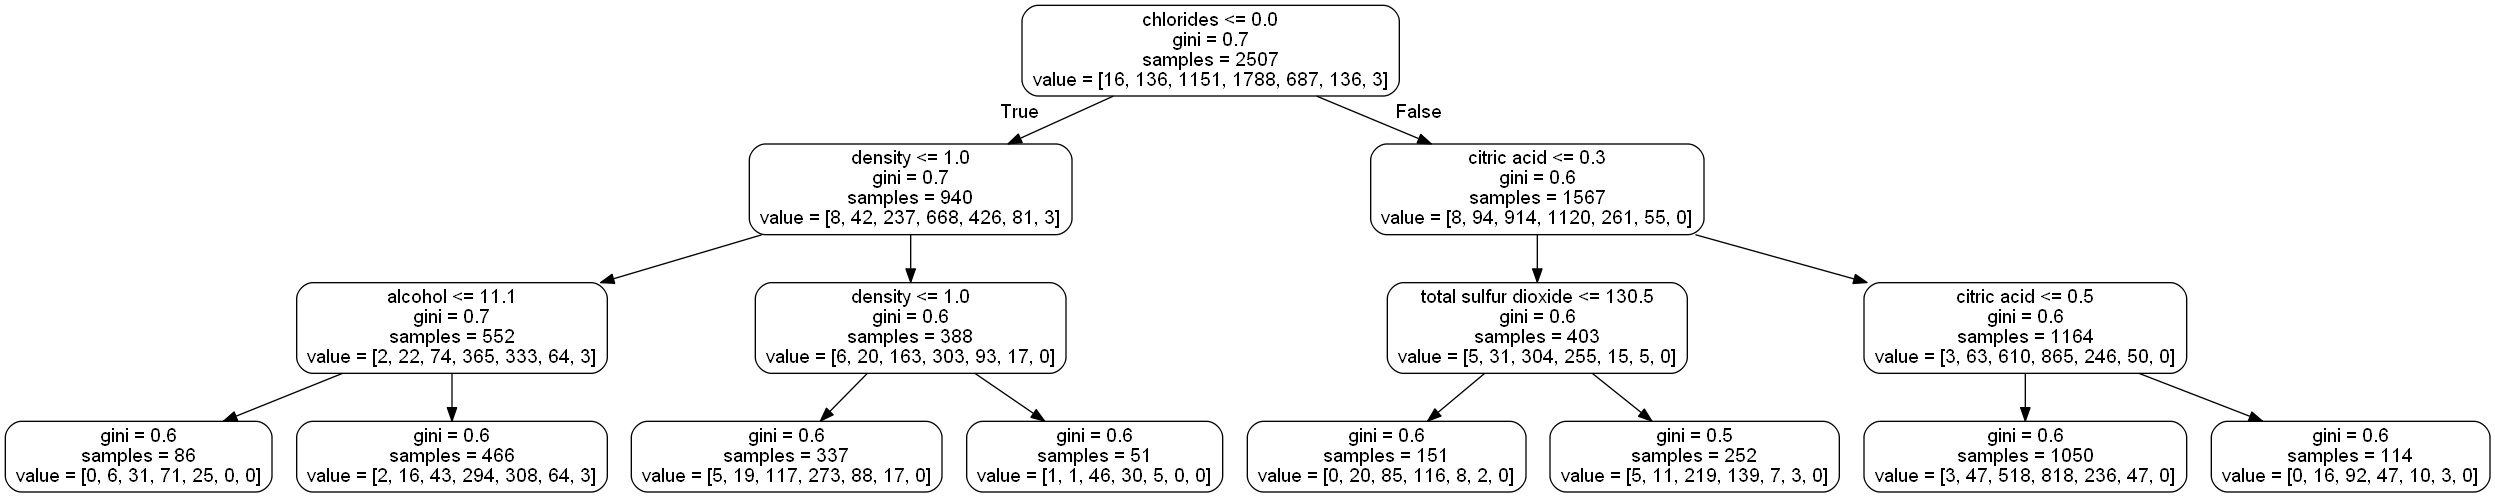

In [25]:
Image(graph.create_png()) 

Decision Trees is one of the ML algorithms that can be readily interpretated by humans. So suppose that we have a sample such that *chlorides<=0*, *density<=1*, *alcohol<=11.1* then we would end up at the first leaf on the left.

Here we can see that the leaf is far from pure with a high [gini](https://en.wikipedia.org/wiki/Gini_coefficient) of 0.6. We see that we have 86 samples and the classified class will be class 6 because it has the largest number of samples, namely 71 (at the *value* array, classes start from 3 and end to 9).

### On Random Forests

If we see the number of samples in the head node it is <i>2507</i> which is significantly lower than the total number of training samples <i>(3917)</i>. This is because Random Forests incorporate two kind of random processes:
1. Pick a random number of samples
2. Pick a random number of features from the feature vector

This ensures the uniqueness of its trees. This method is called <i>bootstrap agreggating</i> or short <i>bagging</i>.

## Variable Importances

Lets investigate the importance of each variable. We already tried to do such a thing earlier with correlation but this is the real deal! It is not at an uncommon occurrence that too many variables might spoil the model. Who knows, maybe we could even further boost our model.

In [26]:
importances = list(rf.feature_importances_)
imp_variables = [(feat, imp) for feat, imp in zip(features_list, importances)]

# Sort
imp_variables.sort(key=lambda x: x[1], reverse=True)
imp_variables

[('alcohol', 0.11638419885565435),
 ('density', 0.10592626788719835),
 ('volatile acidity', 0.09957170080572005),
 ('free sulfur dioxide', 0.09378964518565094),
 ('total sulfur dioxide', 0.09084575824914852),
 ('residual sugar', 0.08537025163174733),
 ('pH', 0.0852806344591873),
 ('chlorides', 0.08267180779843683),
 ('citric acid', 0.08244597618217847),
 ('sulphates', 0.08221810955677061),
 ('fixed acidity', 0.07549564938830727)]

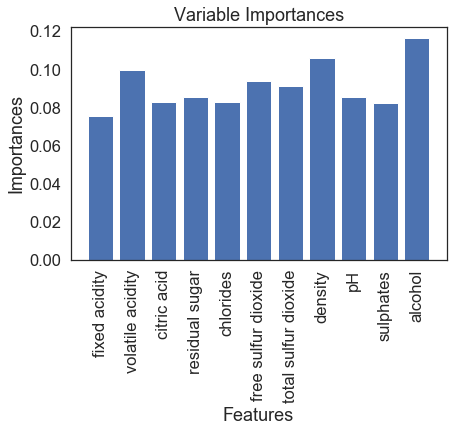

In [27]:
# Visualize variable importances
plt.bar(features_list, importances)
plt.xticks(rotation='vertical')
plt.xlabel("Features"); plt.ylabel("Importances"); plt.title("Variable Importances"); plt.show()

The result is quite different from the SVN output as reported in the paper.

For the white wine the top 5 variable importances are:
1. Sulphates: 20%
2. Alcohol: 14%
3. Residual Sugar: 13%
4. Citric acid: 11%
5. Total Sulfur dioxide 10.5%

In our model the results are quite different with only two results being in the top five for both models. 

This tells us that for predicting the quality of a white wine, *alcohol* is the most important feature, follower by *volatile acidity* and *density* which all have more than 10% of the importance. Maybe this is a sign of why our model is doing better. After all the paper is from 2009 and it is quite likely that the state-of-the-art implementation of scikit-learn is more robust than the algorithm used by the paper.

**To conclude, all our variables seem to be important and only minor differences exist between them.**


# Conclusion

The model that we build can classify with 96.22% the quality of the wine (with a tolerance of 1 point in both directions). This is much better than the 89% accuracy of the paper (from 2009).

Next we will take a look at possible ways to adjust and improve the model.